In [ ]:
TASK 3

PREDICTIVE MODELING WITH LINEAR REGRESSION

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay ,f1_score, precision_score, recall_score

In [2]:
#Load csv

data = pd.read_csv('C:/Users/DHRUVI/Downloads/IPL IMB381IPL2013.csv')
data

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000


In [11]:
x = data.iloc[:,9:13].values
print(x)

[[  0.     0.     0.     0.  ]
 [ 71.41 185.    37.6    0.  ]
 [ 80.62 288.    32.9    0.  ]
 [ 84.56  51.    36.8    0.  ]
 [ 45.93   0.     0.     0.  ]
 [ 72.26   0.     0.     1.  ]
 [ 78.94  34.    42.5    0.  ]
 [ 92.59  62.    31.3    0.  ]
 [ 85.77  72.    53.     1.  ]
 [ 84.76   0.     0.     1.  ]
 [ 81.39 142.    34.1    0.  ]
 [ 70.74  14.    52.8    1.  ]
 [ 65.51  32.    41.     0.  ]
 [ 93.19   0.     0.     1.  ]
 [ 56.09   0.     0.     0.  ]
 [ 88.19   1.    12.     1.  ]
 [ 86.8   67.    58.3    1.  ]
 [ 60.     5.    61.4    0.  ]
 [ 71.24   4.    46.5    1.  ]
 [ 84.    25.    47.6    0.  ]
 [ 45.62  60.    35.6    0.  ]
 [ 60.96 187.    34.7    0.  ]
 [ 71.49   1.    29.     1.  ]
 [ 88.82 169.    33.2    1.  ]
 [ 86.17   0.     0.     1.  ]
 [ 73.7  100.    45.6    1.  ]
 [ 83.95 156.    44.4    1.  ]
 [ 83.26   0.     0.     1.  ]
 [ 96.94   0.     0.     1.  ]
 [  0.     2.    39.     0.  ]
 [ 80.51 259.    46.5    1.  ]
 [100.    44.    23.4    0.  ]
 [ 78.96

In [12]:
#Variable (Independent)
y = data.iloc[:,4].values
print(y)

['KXIP' 'RCB' 'KKR' 'CSK' 'CSK' 'CSK' 'CSK+' 'CSK' 'RR' 'RCB+' 'MI+' 'RCB'
 'KXIP' 'DD+' 'MI+' 'CSK' 'DD+' 'KKR+' 'RCB+' 'MI+' 'DC' 'MI' 'CSK' 'CSK'
 'DD+' 'KKR+' 'KKR+' 'DC' 'DC+' 'CSK+' 'MI' 'DC+' 'CSK' 'RR' 'KKR+' 'KKR+'
 'KXIP' 'KKR+' 'CSK' 'RR+' 'RCB' 'MI' 'KXIP+' 'RR+' 'RCB' 'RR' 'RR+' 'DD+'
 'KKR+' 'KXIP' 'RCB' 'RCB+' 'RCB' 'KKR+' 'DC+' 'KXI+' 'DD' 'MI' 'RR+'
 'KKR+' 'KKR+' 'DD+' 'DD' 'RCB' 'DD+' 'RCB' 'DD' 'CSK' 'RR+' 'CSK+' 'DD+'
 'MI+' 'DD+' 'RCB' 'CSK' 'RR+' 'DC+' 'CSK+' 'RCB+' 'RR+' 'CSK+' 'KXIP+'
 'RR+' 'RCB+' 'MI' 'KXIP+' 'KKR' 'KXIP+' 'CSK' 'RCB+' 'KKR+' 'KXIP+'
 'KXIP' 'DD' 'DC' 'KKR+' 'CSK' 'DC+' 'KKR' 'DD' 'DC' 'DC+' 'DC+' 'RR+'
 'RR' 'KXIP+' 'RCB+' 'DC+' 'DC+' 'KKR' 'RCB+' 'MI' 'DD+' 'MI+' 'CSK' 'KKR'
 'RCB+' 'DC' 'RCB+' 'DC+' 'DD+' 'RCB+' 'RR' 'DD' 'RCB+' 'DC' 'RR' 'KXIP+'
 'MI+' 'DC']


In [27]:
#handle missing values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=108)
x_train

array([[ 72.97, 270.  ,  39.3 ,   1.  ],
       [ 80.62, 288.  ,  32.9 ,   0.  ],
       [ 83.95, 156.  ,  44.4 ,   1.  ],
       [ 78.96, 165.  ,  34.  ,   0.  ],
       [ 93.71,  67.  ,  47.1 ,   0.  ],
       [ 89.72,  11.  ,  34.8 ,   0.  ],
       [ 91.4 ,  18.  ,  36.2 ,   0.  ],
       [ 86.76,   7.  ,  57.1 ,   1.  ],
       [ 70.4 ,   1.  ,  42.  ,   0.  ],
       [ 81.93, 282.  ,  45.7 ,   1.  ],
       [ 75.1 ,   0.  ,   0.  ,   1.  ],
       [ 78.96,   0.  ,   0.  ,   0.  ],
       [ 73.57,  91.  ,  33.7 ,   0.  ],
       [ 34.05,  64.  ,  33.6 ,   0.  ],
       [ 75.68,   1.  ,  60.  ,   0.  ],
       [ 86.23, 154.  ,  52.2 ,   1.  ],
       [ 67.58,   2.  ,  42.  ,   1.  ],
       [ 87.51,   1.  ,  66.  ,   0.  ],
       [ 71.49,   1.  ,  29.  ,   1.  ],
       [ 70.74,  14.  ,  52.8 ,   1.  ],
       [ 91.21, 323.  ,  46.  ,   1.  ],
       [ 87.5 ,   0.  ,   0.  ,   0.  ],
       [ 50.  ,   3.  ,  55.  ,   0.  ],
       [ 89.62,   0.  ,   0.  ,   1.  ],
       [ 34.  , 

In [28]:
x_test

array([[ 72.04, 293.  ,  36.3 ,   1.  ],
       [ 60.96, 187.  ,  34.7 ,   0.  ],
       [ 65.51,  32.  ,  41.  ,   0.  ],
       [  0.  ,   2.  ,  39.  ,   0.  ],
       [ 93.19,   0.  ,   0.  ,   1.  ],
       [ 79.41, 137.  ,  44.6 ,   0.  ],
       [ 69.04, 154.  ,  32.2 ,   0.  ],
       [ 57.31, 157.  ,  36.6 ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ],
       [ 78.08,   7.  ,  83.1 ,   1.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ],
       [ 72.26,   0.  ,   0.  ,   1.  ],
       [ 61.06, 337.  ,  43.  ,   1.  ],
       [ 71.24,   4.  ,  46.5 ,   1.  ],
       [ 81.39, 142.  ,  34.1 ,   0.  ],
       [ 71.23,   0.  ,   0.  ,   1.  ],
       [ 77.56, 534.  ,  35.2 ,   0.  ],
       [ 60.  ,   1.  ,  90.  ,   0.  ],
       [ 84.  ,  25.  ,  47.6 ,   0.  ],
       [ 80.51, 259.  ,  46.5 ,   1.  ],
       [ 70.78,  37.  ,  51.5 ,   0.  ],
       [ 86.8 ,  67.  ,  58.3 ,   1.  ],
       [ 68.74,   0.  ,   0.  ,   0.  ],
       [100.  , 

In [29]:
y_train

array([13,  6,  7, 10,  9, 14,  7, 14,  2,  5, 13,  0, 14,  7,  5, 11,  6,
        7,  0, 13, 11, 12,  0,  7,  4,  2, 14,  0, 10,  3,  0, 13,  3,  1,
       15,  5, 14,  2,  7, 16, 15,  0, 13, 11, 16,  3, 15,  5,  0,  5,  3,
       15, 11,  2,  7, 16, 14, 10, 13, 16,  0,  0, 10,  2, 14,  3,  6,  4,
        7, 12, 16, 10,  5, 12, 16,  0,  0,  4,  4,  5, 15,  8,  9,  3,  1,
       12,  3,  0, 13,  3, 14,  4,  1,  7, 10, 13, 14, 16,  6, 14, 16,  7,
        0,  4])

In [30]:
y_test

array([15, 11,  9,  1,  5,  3,  6,  5,  2, 16, 10,  9,  0, 13, 14, 12,  3,
        1,  7, 12, 11,  7,  5,  9, 14,  2])

In [31]:
#missing values
missing_values = data.isna().sum()
missing_values

Sl.NO.           0
PLAYER NAME      0
AGE              0
COUNTRY          0
TEAM             0
PLAYING ROLE     0
T-RUNS           0
T-WKTS           0
ODI-RUNS-S       0
ODI-SR-B         0
ODI-WKTS         0
ODI-SR-BL        0
CAPTAINCY EXP    0
RUNS-S           0
HS               0
AVE              0
SR-B             0
SIXERS           0
RUNS-C           0
WKTS             0
AVE-BL           0
ECON             0
SR-BL            0
AUCTION YEAR     0
BASE PRICE       0
SOLD PRICE       0
dtype: int64

In [32]:
#Transform categorical variables into numerical representations using encoding techniques
le_y = LabelEncoder()
Y=le_y.fit_transform(y)
Y

array([ 9, 13,  6,  0,  0,  0,  1,  0, 15, 14, 12, 13,  9,  5, 12,  0,  5,
        7, 14, 12,  2, 11,  0,  0,  5,  7,  7,  2,  3,  1, 11,  3,  0, 15,
        7,  7,  9,  7,  0, 16, 13, 11, 10, 16, 13, 15, 16,  5,  7,  9, 13,
       14, 13,  7,  3,  8,  4, 11, 16,  7,  7,  5,  4, 13,  5, 13,  4,  0,
       16,  1,  5, 12,  5, 13,  0, 16,  3,  1, 14, 16,  1, 10, 16, 14, 11,
       10,  6, 10,  0, 14,  7, 10,  9,  4,  2,  7,  0,  3,  6,  4,  2,  3,
        3, 16, 15, 10, 14,  3,  3,  6, 14, 11,  5, 12,  0,  6, 14,  2, 14,
        3,  5, 14, 15,  4, 14,  2, 15, 10, 12,  2], dtype=int64)

In [33]:
Label_encoder = LabelEncoder()
y=Label_encoder.fit_transform(y)
y

array([ 9, 13,  6,  0,  0,  0,  1,  0, 15, 14, 12, 13,  9,  5, 12,  0,  5,
        7, 14, 12,  2, 11,  0,  0,  5,  7,  7,  2,  3,  1, 11,  3,  0, 15,
        7,  7,  9,  7,  0, 16, 13, 11, 10, 16, 13, 15, 16,  5,  7,  9, 13,
       14, 13,  7,  3,  8,  4, 11, 16,  7,  7,  5,  4, 13,  5, 13,  4,  0,
       16,  1,  5, 12,  5, 13,  0, 16,  3,  1, 14, 16,  1, 10, 16, 14, 11,
       10,  6, 10,  0, 14,  7, 10,  9,  4,  2,  7,  0,  3,  6,  4,  2,  3,
        3, 16, 15, 10, 14,  3,  3,  6, 14, 11,  5, 12,  0,  6, 14,  2, 14,
        3,  5, 14, 15,  4, 14,  2, 15, 10, 12,  2], dtype=int64)

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [35]:
#Linear regression 
lr = LinearRegression()
model=lr.fit(x_train,y_train)
y_prediction = model.predict(x_test)
y_prediction

array([9.12317017, 7.81284344, 7.63445139, 8.24268361, 7.95485935,
       7.83776322, 8.44096508, 8.12630676, 8.63760428, 8.58528537,
       8.38161119, 9.12317017, 8.10925358, 7.45638958, 8.48328137,
       8.28178522, 7.83908128, 7.56671191, 8.143651  , 8.76785903,
       8.4558423 , 9.12317017, 7.53023056, 7.82479114, 8.35207479,
       8.48842703, 8.13159071, 7.99959239, 8.5524455 , 8.28709759,
       8.60062773, 8.8421117 , 7.81117419])

In [37]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_prediction)
print("Mean Squared Error:", mse)

Mean Squared Error: 31.5064649061992


In [39]:
r2 = r2_score(y_test, y_prediction)
print("R-squared Score:", r2)

R-squared Score: -0.07752466185701046


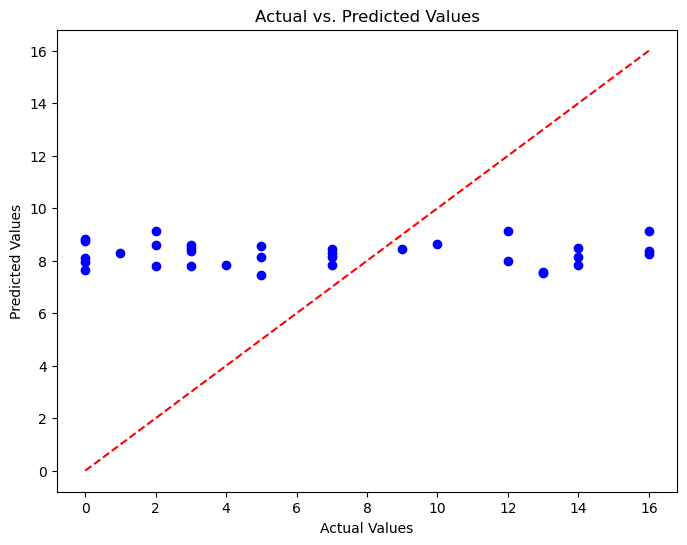

In [40]:
import matplotlib.pyplot as plt

# Plotting the predicted values against the actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_prediction, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

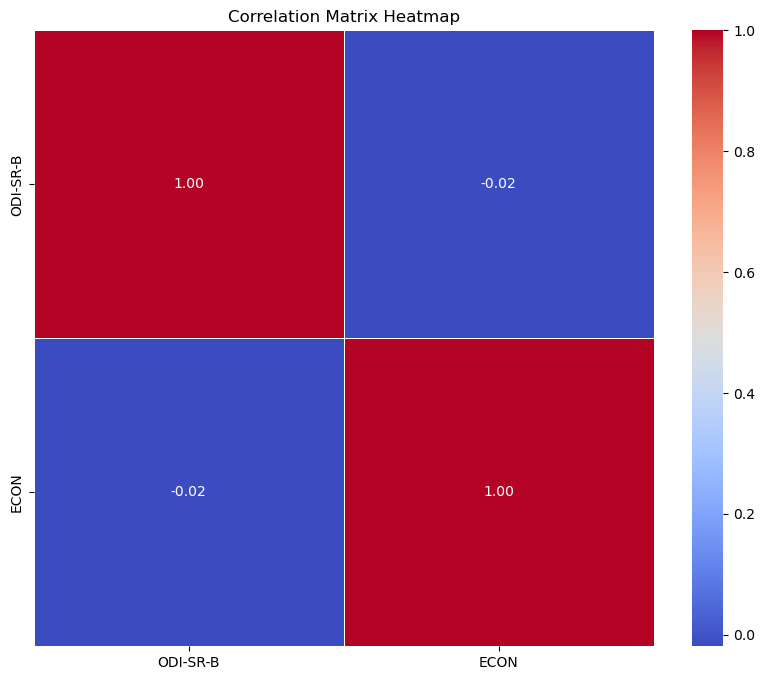

In [51]:
import seaborn as sns

# Compute the correlation matrix
data1=data[['ODI-SR-B','ECON']]
corr_matrix = data1.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

C:\Users\DHRUVI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DHRUVI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DHRUVI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DHRUVI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option

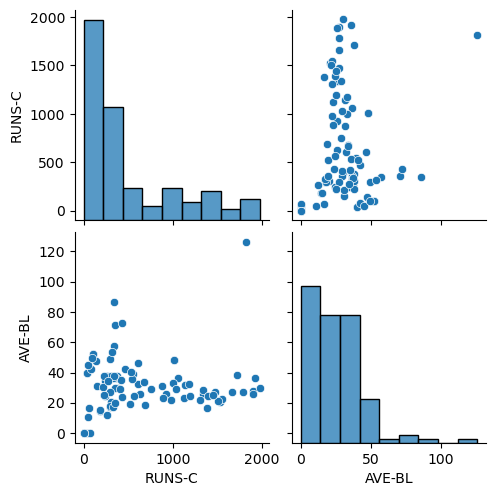

In [53]:
# Plotting pair plot
sns.pairplot(data[['RUNS-C','AVE-BL']])
plt.show()